In [2]:
import tensorflow

/home/deepak/anaconda3/envs/2048game/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [5]:
import sys
import os
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense, Activation
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras import callbacks
from keras.models import load_model


In [3]:
DEV = False
argvs = sys.argv
argc = len(argvs)

In [4]:
if argc > 1 and (argvs[1] == "--development" or argvs[1] == "-d"):
    DEV = True

In [5]:
if DEV:
    epochs = 2
else:
    epochs = 15

In [6]:
train_data_path = './data/train'
validation_data_path = './data/validation'

In [39]:
img_width, img_height = 100, 100 
batch_size = 8
samples_per_epoch = 8
validation_steps = 3
nb_filters1 = 32
nb_filters2 = 64
conv1_size = 3
conv2_size = 2
pool_size = 2
classes_num = 2
lr = 0.0004

In [40]:
model = Sequential()
model.add(Convolution2D(nb_filters1, conv1_size, conv1_size, border_mode ="same", input_shape=(img_width, img_height, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(pool_size, pool_size)))

model.add(Convolution2D(nb_filters2, conv2_size, conv2_size, border_mode ="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(pool_size, pool_size), dim_ordering='th'))

model.add(Flatten())
model.add(Dense(256))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(classes_num, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=lr),
              metrics=['accuracy'])

/home/deepak/anaconda3/envs/2048game/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(100, 100,..., padding="same")`
  
/home/deepak/anaconda3/envs/2048game/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (2, 2), padding="same")`
  
/home/deepak/anaconda3/envs/2048game/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(pool_size=(2, 2), data_format="channels_first")`
  


In [47]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=False)

In [48]:
test_datagen = ImageDataGenerator(rescale=1. / 255)

In [49]:
train_generator = train_datagen.flow_from_directory(
    train_data_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

Found 112 images belonging to 2 classes.


In [50]:
validation_generator = test_datagen.flow_from_directory(
    validation_data_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

Found 16 images belonging to 2 classes.


In [51]:
"""
Tensorboard log
"""
log_dir = './tf-log/'
tb_cb = callbacks.TensorBoard(log_dir=log_dir, histogram_freq=0)
cbks = [tb_cb]

In [52]:
model.fit_generator(
    train_generator,
    samples_per_epoch=samples_per_epoch,
    epochs=epochs,
    validation_data=validation_generator,
    callbacks=cbks,
    validation_steps=validation_steps)

target_dir = './models/'
if not os.path.exists(target_dir):
    os.mkdir(target_dir)
model.save('./models/model.h5')
model.save_weights('./models/weights.h5')

/home/deepak/anaconda3/envs/2048game/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., epochs=15, validation_data=<keras_pre..., callbacks=[<keras.ca..., validation_steps=3, steps_per_epoch=1)`
  import sys


Epoch 1/15
1/1 [==============================] - 1s 591ms/step - loss: 1.8766 - acc: 0.0000e+00 - val_loss: 1.3722 - val_acc: 0.4167
Epoch 2/15
1/1 [==============================] - 1s 569ms/step - loss: 1.4694 - acc: 0.5000 - val_loss: 0.5020 - val_acc: 0.6667
Epoch 3/15
1/1 [==============================] - 1s 536ms/step - loss: 0.8321 - acc: 0.7500 - val_loss: 0.3297 - val_acc: 0.9167
Epoch 4/15
1/1 [==============================] - 1s 519ms/step - loss: 0.2439 - acc: 0.8750 - val_loss: 0.9540 - val_acc: 0.4167
Epoch 5/15
1/1 [==============================] - 1s 511ms/step - loss: 1.3168 - acc: 0.5000 - val_loss: 1.3644 - val_acc: 0.4583
Epoch 6/15
1/1 [==============================] - 1s 523ms/step - loss: 1.9431 - acc: 0.6250 - val_loss: 0.3708 - val_acc: 0.9583
Epoch 7/15
1/1 [==============================] - 0s 499ms/step - loss: 0.8141 - acc: 0.7500 - val_loss: 0.5880 - val_acc: 0.6250
Epoch 8/15
1/1 [==============================] - 1s 676ms/step - loss: 0.7477 - acc: 

In [14]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras.models import Sequential, load_model

In [6]:
img_width, img_height = 100, 100
model_path = './models/model.h5'
model_weights_path = './models/weights.h5'
model = load_model(model_path)
model.load_weights(model_weights_path)

In [7]:
def predict(file):
    x = load_img(file, target_size=(img_width,img_height))
    x = img_to_array(x)
    x = np.expand_dims(x, axis=0)
    array = model.predict(x)
    print(array)
    result = array[0]
    answer = np.argmax(result)
    if answer == 0:
        print("Label1: Exoplanet")
    elif answer == 1:
        print("Label2: Not Exoplanet")
    return answer

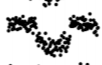

In [9]:
from IPython.display import Image
Image("/home/deepak/Downloads/AI_Project/data/test/Exo1.png")

In [15]:
print(predict('/home/deepak/Downloads/AI_Project/data/test/Exo1.png'))

[[1. 0.]]
Label1: Exoplanet
0


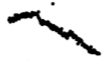

In [17]:
Image("/home/deepak/Downloads/AI_Project/data/test/NotExo3.png")

In [18]:
print(predict('/home/deepak/Downloads/AI_Project/data/test/NotExo3.png'))

[[0. 1.]]
Label2: Not Exoplanet
1


In [73]:
predict('/home/deepak/Downloads/AI Project/data/test/Exo2.png')
predict('/home/deepak/Downloads/AI Project/data/test/Exo6.png')

[[1. 0.]]
Label1: Exoplanet
[[1. 0.]]
Label1: Exoplanet


0

In [57]:
print(predict('/home/deepak/Downloads/AI Project/data/test/NotExo5.png'))
print(predict('/home/deepak/Downloads/AI Project/data/test/NotExo7.png'))

[[0. 1.]]
Label2: Not Exoplanet
1
[[0. 1.]]
Label2: Not Exoplanet
1
[[0. 1.]]
Label2: Not Exoplanet
1
